#**CIS 5190 Final Project**

By: Ethan Ma, Eric Wang, Chung Un Lee (Richard)


# Sports Betting with ML
### Contribution 2:
In this second contribution, we will focus on adding in line data to our previously created datasets as well as modifying the objective to consider this new line data.

## Installations, Imports, and Set-Up:

In [1]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=ab05a2072b842ff6ec818402ecdd03d3580a48ad0b8a5219a44d0bc8ad730309
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import csv
import pandas as pd
import numpy as np
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Mount to Drive (need to sign-in to Google Account)

### Datasets

[Link to Drive](https://drive.google.com/drive/folders/1PdNkjqxJQytu9w2NpsDEIv6e0gmn1ZaZ?usp=sharing)

To run:
1: Download 23_players_reg_pergame, 23_win_loss_data, 23_players_reg_pergame as .csv files to your local Google Drive

In [3]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Import, Cleaning, and Processing

Load the dataset using Pandas.
Please download all .csv files found in the 'Google Colab Data' folder of this drive:
https://drive.google.com/drive/folders/1PdNkjqxJQytu9w2NpsDEIv6e0gmn1ZaZ?usp=sharing



In [4]:
# Initialize news_df using our downloaded csv
combined_df = pd.read_csv('/content/drive/MyDrive/combinedData.csv')
combined_team_df = pd.read_csv('/content/drive/MyDrive/allCombined.csv')
line_df = pd.read_csv('/content/drive/MyDrive/ROTOWIRE_data.csv')


In [5]:
# Show the first 10 rows of news_df
combined_df.head(10)

,Unnamed: 0,p_PTS,p_FGM,p_FGA,p_TPA,p_TPM,p_FTM,p_FTA,p_OREB,p_DREB,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,label
0,0,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,-0.4,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,0
1,1,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,-0.4,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,0
2,2,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,-0.4,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,1
3,3,-1.033333,-0.166667,-0.666667,-1.8,-0.733333,0.066667,0.066667,-0.3,-0.4,...,0.9,3.9,-0.5,-0.8,0.0,-1.3,1.1,-2.3,1.2,0
4,4,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,0
5,5,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,1
6,6,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,0
7,7,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,1
8,8,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,0
9,9,0.700000,0.400000,1.133333,-0.4,-0.233333,0.133333,0.233333,-0.2,-0.2,...,-2.4,-0.9,-1.7,-0.5,0.7,-0.3,1.1,0.0,0.6,0


In [6]:
combined_team_df

,Unnamed: 0,label,home_line,tipoff,away_score,home_score,home_team,away_team,W,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,season
0,0,1,-9.5,2/14,125,131,MIL,BOS,1,-1.0,...,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1,2022
1,1,0,-2.0,3/30,140,99,MIL,BOS,1,-1.0,...,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1,2022
2,2,0,-4.5,3/4,133,130,MIL,PHI,4,1.7,...,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6,2022
3,3,1,-5.0,4/2,104,117,MIL,PHI,4,1.7,...,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6,2022
4,4,1,-12.5,1/25,99,107,MIL,DEN,5,1.1,...,4.6,5.6,-3.1,0.1,-1.1,0.4,-0.3,-0.6,-0.5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,0,4.5,3/6,110,104,DET,POR,-16,-3.1,...,0.2,1.9,-1.2,0.6,0.3,-0.8,1.2,2.1,0.5,2022
1308,1308,1,1.0,2/3,112,118,DET,CHA,-10,-0.7,...,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7,2022
1309,1309,0,3.0,3/9,113,103,DET,CHA,-10,-0.7,...,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7,2022
1310,1310,0,-5.5,1/28,117,114,DET,HOU,-5,-0.4,...,-1.6,-3.9,0.6,-1.1,-0.3,-0.8,-0.7,1.6,0.4,2022


In [7]:
line_df.head(10)

,away_team,home_team,tipoff,season,away_score,home_score,over_under,home_line
0,BOS,CLE,10/17,2017,99,102,216.0,-4.5
1,HOU,GSW,10/17,2017,122,121,231.0,-9.5
2,CHA,DET,10/18,2017,90,102,202.0,-2.5
3,BKN,IND,10/18,2017,131,140,216.5,-3.0
4,MIA,ORL,10/18,2017,109,116,205.5,3.5
5,PHI,WAS,10/18,2017,115,120,217.5,-6.5
6,MIL,BOS,10/18,2017,108,100,203.0,-1.5
7,NOP,MEM,10/18,2017,91,103,204.5,-2.0
8,ATL,DAL,10/18,2017,117,111,199.0,-5.5
9,DEN,UTA,10/18,2017,96,106,205.0,-2.5


Drop null values, any cleaning here

In [8]:
# TODO

# Cleaning Data and Creating Datasets

In [9]:
final_df = combined_team_df.drop(columns=['Unnamed: 0', 'home_team', 'away_team', 'season', 'home_score', 'away_score', 'tipoff'])
# final_df = final_df[['home_line', 'label']]
final_df

,label,home_line,W,PTS,FGM,FGA,TPA,TPM,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,1,-9.5,1,-1.0,0.5,1.6,-2.3,-1.2,-0.9,0.8,1.4,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1
1,0,-2.0,1,-1.0,0.5,1.6,-2.3,-1.2,-0.9,0.8,1.4,1.9,3.3,-0.9,1.2,0.0,-0.3,0.0,-0.8,-0.1
2,0,-4.5,4,1.7,1.9,6.6,7.7,2.2,-4.4,-2.7,2.4,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6
3,1,-5.0,4,1.7,1.9,6.6,7.7,2.2,-4.4,-2.7,2.4,5.3,7.7,0.6,0.9,-1.3,0.2,-0.7,-2.4,-0.6
4,1,-12.5,5,1.1,-0.9,4.0,9.1,3.0,-0.2,0.0,1.0,4.6,5.6,-3.1,0.1,-1.1,0.4,-0.3,-0.6,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0,4.5,-16,-3.1,-0.9,1.7,-2.9,-1.5,0.2,1.1,1.8,0.2,1.9,-1.2,0.6,0.3,-0.8,1.2,2.1,0.5
1308,1,1.0,-10,-0.7,-1.7,-3.3,-0.1,0.7,2.2,2.1,0.2,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7
1309,0,3.0,-10,-0.7,-1.7,-3.3,-0.1,0.7,2.2,2.1,0.2,-2.2,-2.1,-2.1,0.9,-0.7,-1.4,-0.2,1.8,0.7
1310,0,-5.5,-5,-0.4,-1.0,-1.8,0.5,1.0,0.7,0.4,-2.2,-1.6,-3.9,0.6,-1.1,-0.3,-0.8,-0.7,1.6,0.4


In [12]:
matching_rows = ((final_df['home_line'] < 0) & (final_df['label'] == 1)) | \
           ((final_df['home_line'] > 0) & (final_df['label'] == 0))
# Calculate the percentage of matching rows
matching_percentage = (matching_rows.sum() / len(final_df)) * 100
print(f"Rate that the home_line is correct: {matching_percentage}")

Rate that the home_line is correct: 64.78658536585365


# Creating Test/Training Datasets

First, we use sklearn's ```train_test_split``` to split from the ```cleaned_news_df``` into training and testing sets.



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create features from all except label
features = final_df.drop(columns='label')

# Extract target from the label
target = final_df['label']

# Set seed to 42, then perform the train test split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = seed, test_size = 0.2)

## Logistic Regression Model (sklearn)



###Section 3.3.1 The Base Model

WRITE DESCRIPTION HERE

In [14]:
# Import our logistic regression module from sklearn
from sklearn.linear_model import LogisticRegression

In [15]:
# Set seed to 42, then initialize and fit our model
seed = 42
logR = LogisticRegression(max_iter=30000, penalty='l2')

logR.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [16]:
from sklearn.metrics import accuracy_score

# With our newly fitted model, predict on both training and testing data
y_pred = logR.predict(X_test)
y_pred_train = logR.predict(X_train)

lr_test_accuracy = accuracy_score(y_pred, y_test)
lr_train_accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of train Logistic Classifier: %.1f%%"% (lr_train_accuracy*100))
print("Accuracy of test Logistic Classifier: %.1f%%"% (lr_test_accuracy*100))

Accuracy of train Logistic Classifier: 66.3%
Accuracy of test Logistic Classifier: 69.2%


In [17]:
logR.predict_proba(X_train)

array([[0.17781719, 0.82218281],
       [0.40186044, 0.59813956],
       [0.40908822, 0.59091178],
       ...,
       [0.72164561, 0.27835439],
       [0.2703026 , 0.7296974 ],
       [0.50685944, 0.49314056]])

### Analysis of Feature Importances

In [18]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


pca = PCA(n_components=len(features.columns))
X_pca = pca.fit_transform(features)

rf_pca = RandomForestClassifier(n_estimators=100,
                                max_depth=6,
                                random_state=seed,
                                class_weight='balanced')
rf_pca.fit(X_pca, target)

importances = rf_pca.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

top_features_indices = sorted_indices[:10]
top_features = features.columns[top_features_indices]

print("Top Features by Importance:")
for feature, importance in zip(top_features, importances[top_features_indices]):
    print(f"{feature}: {importance:.4f}")


Top Features by Importance:
home_line: 0.2729
W: 0.0651
FGA: 0.0554
FGM: 0.0551
STL: 0.0438
PTS: 0.0427
DREB: 0.0410
FTA: 0.0406
TOV: 0.0401
BLK: 0.0395


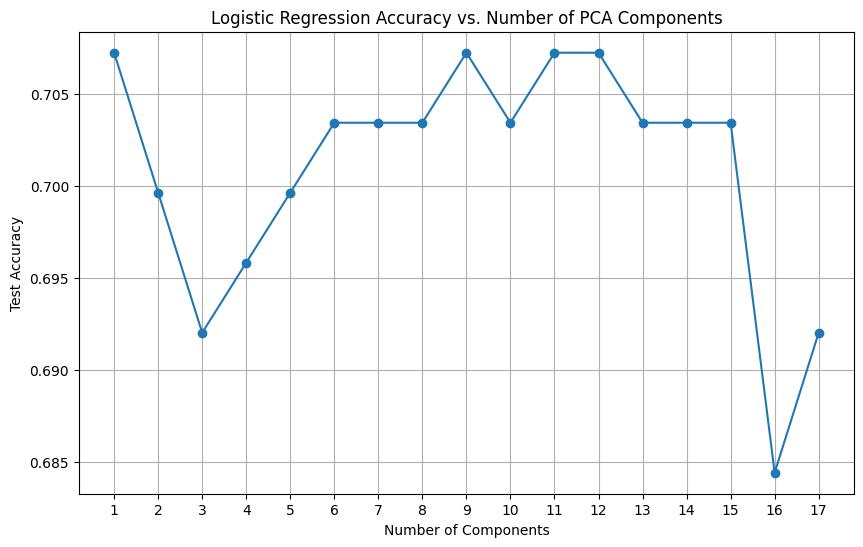

In [19]:
import matplotlib.pyplot as plt


component_values = []
test_accuracies = []

for n_components in range(1, 18):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    seed = 42
    log_pca = LogisticRegression(max_iter=10000)
    log_pca.fit(X_train_pca, y_train)

    y_pred_pca = log_pca.predict(X_test_pca)

    test_accuracy_pca = accuracy_score(y_test, y_pred_pca)

    component_values.append(n_components)
    test_accuracies.append(test_accuracy_pca)

plt.figure(figsize=(10, 6))
plt.plot(component_values, test_accuracies, marker='o')
plt.title('Logistic Regression Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.xticks(component_values)
plt.grid(True)
plt.show()

## Random Forest Classifier Model

ADD DESCRIPTION

In [20]:
# Import all modules for random forest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
# Setting seed to 42, initialize our Random Forest Classifier
seed = 42
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=5,
                            random_state=seed)

# Fit the classifier on our dataset
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [22]:
# Find accuracies for both training and test data
y_pred = rf.predict(X_test.values)
y_pred_train = rf.predict(X_train.values)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training Accuracy of Random Forest Classifier: %.1f%%"% (train_accuracy*100))
print("Testing Accuracy of Random Forest Classifier: %.1f%%"% (test_accuracy*100))

Training Accuracy of Random Forest Classifier: 73.7%
Testing Accuracy of Random Forest Classifier: 71.5%


In [23]:
rf.predict_proba(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0.16351857, 0.83648143],
       [0.42346165, 0.57653835],
       [0.47068632, 0.52931368],
       ...,
       [0.75183207, 0.24816793],
       [0.2617512 , 0.7382488 ],
       [0.45792253, 0.54207747]])

# Modifying Objective

We want to modify our objective in order to penalize predictions that match the sports book.

To our (binary) cross entropy loss, we will add the following penalty with hyperparameter c:

$c[max(0, p_o+p_c-1)+max(0,1-p_o-p_c)]$

$p_o\in [0,1]$ is the our output prediction, and $p_c\in\{0,1\}$ is the sports book prediction.

We are essentially penalizing everytime they match, similar to how the custom objective and loss was computed in homework 5, translated into something that is differentiable.

Thus the overall loss is:

$L=\frac{1}{n}\sum_{i=1}^n[y_ilog(p_o)+(1-y_i)log(1-p_o)]+\frac{c}{n}\sum_{i=1}^n[max(0, p_o+p_c-1)+max(0,1-p_o-p_c)]$

Where $p_o=\sigma(\theta^Tx_i)$

Custom logistic regression implementation referenced from:
https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226

In [24]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
        self.c = 0.05

    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def sep_loss(self, y_true, y_pred, line):
        diff = (y_true - y_pred) ** 2
        penalty = self.c * (y_pred - self._sigmoid(line))
        n = y_true.shape[0]
        return 1 / n * (diff - penalty)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def penalty(self, X, pred):
      sig_grad = (1 - pred)
      p_cs = X[:,0]
      pena = 0
      for i, sig_g in enumerate(sig_grad):
          # print(f"X[i]: {X}")
          # print(f"i: {i}")
          # probability from sports book
          sig_g *= X[i]
          p_c = 1 if p_cs[i] <= 0 else 0
          p_i = pred[i]

          # and
          if p_c + p_i - 1 >= 0:
              pena += sig_g

          # or
          # not A and not B
          if 1 - p_c - p_i >= 0:
              pena -= sig_g


      return (self.c * pena / X.shape[1])

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            penalty = self.penalty(X, A)

            dw = (1 / n_samples) * (np.dot(X.T, dz)) + penalty
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)

    def predict_proba(self, X):
      threshold = .5
      y_hat = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(y_hat)

      return np.array(y_predicted)



In [25]:
print(f"train: {X_train}, values: {X_train.values}")
lr = CustomLogisticRegression()
lr.fit(X_train.values, y_train.values)

print(lr.predict_proba(X_train.values))
print(lr.predict(X_train.values))
# print(lr.losses)

train:       home_line   W  PTS  FGM  FGA  TPA  TPM  FTM  FTA  OREB  DREB  REB  AST  \
901       -10.0  18  6.8  2.5  3.7  2.2  1.7  0.1 -1.6  -2.0  -0.6 -2.6  2.0   
352        -2.0   6 -2.4 -2.6 -3.0  5.2  1.8  0.9  2.9   1.4   0.8  2.2 -2.1   
199        -3.0  -2 -3.5 -2.0 -1.2  0.4 -0.2  0.7  0.1  -0.4  -1.5 -1.9 -4.0   
306        -2.0   7  2.3 -1.0 -4.2  6.8  3.0  1.3  2.5  -1.7  -0.3 -1.9  2.3   
296         2.0   4  1.8  0.5 -2.0 -5.9 -2.8  3.8  4.9  -1.0  -1.2 -2.1 -2.5   
...         ...  ..  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   
1095        1.0  -6 -6.1 -2.6 -6.3 -3.0 -1.3  0.4  1.3  -1.2   0.8 -0.5 -1.2   
1130       -3.0  -9 -1.0 -1.5 -2.2  5.2  1.9  0.3  0.2  -1.2  -2.0 -3.2 -1.7   
1294        6.0 -24 -8.1 -5.0 -5.3  1.9  0.6  1.3  3.1   0.0  -1.9 -2.0 -2.0   
860        -6.5  13  2.1  1.2 -3.6 -3.6 -0.3  0.0 -1.8  -2.5   0.4 -2.1 -0.6   
1126       -6.0 -10 -3.8 -2.4 -3.6  4.1  2.1 -1.0 -2.0  -0.6  -4.6 -5.2 -1.1   

      TOV  STL  BLK  BLKA   PF  

In [26]:
y_pred_train = lr.predict(X_train.values)
y_pred = lr.predict(X_test.values)
train_accuracy = accuracy_score(y_train.values, y_pred_train)
test_accuracy = accuracy_score(y_pred, y_test.values)

print("Training Accuracy of Modified LR: %.1f%%"% (train_accuracy*100))
print("Testing Accuracy of Modified LR: %.1f%%"% (test_accuracy*100))

Training Accuracy of Modified LR: 35.5%
Testing Accuracy of Modified LR: 30.4%


In [27]:
def create_adjusted_pred(row):
  return lr.predict(np.array(row.drop(columns=["label"])).reshape(-1, 1))

output_df = final_df

features = final_df.drop(columns=['label'])

# Create a new list to store the predictions
predictions = []

# Iterate through each row and apply rf.predict()
for index, row in features.iterrows():
    # Exclude the label column for prediction
    # print(row)
    prediction = lr.predict_proba(row.values)

    # Append the prediction to the list
    predictions.append(prediction)

# Add predictions as a new column to the original DataFrame
output_df['predictions'] = predictions
output_df = output_df[['label', 'home_line', 'predictions']].sort_values(by=['predictions'], ascending=False)

In [28]:
# sorted by prediction descending
output_df.head(20)

,label,home_line,predictions
603,0,4.0,1.0
948,1,4.5,1.0
950,1,7.0,1.0
951,1,10.0,1.0
952,1,2.5,1.0
953,1,3.0,1.0
954,1,2.5,1.0
955,0,-3.0,1.0
956,1,7.0,1.0
331,1,1.0,1.0


In [30]:
def count_differing(df):
    matching_rows = ((df['home_line'] < 0) & (df['label'] == 0) & (df['predictions'] <= 0.5)) | \
           ((df['home_line'] > 0) & (df['label'] == 1) & (df['predictions'] > 0.5))
    # matching_rows = ((df['home_line'] < 0) & (df['label'] == 0)) | \
    #        ((df['home_line'] > 0) & (df['label'] == 1))
    return matching_rows
first = output_df.head(200)

# Select the last 20 rows
last = output_df.tail(20)
# print(f"first: {first}, last: {last}")
print(count_differing(first).sum())
# print(count_differing(first).sum() + count_differing(last).sum())


69


In [31]:
from google.colab import files

output_df.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluation

In [32]:
def count_differing(df):
    matching_rows = ((df['home_line'] < 0) & (df['label'] == 0) & (df['predictions'] <= 0.5)) | \
           ((df['home_line'] > 0) & (df['label'] == 1) & (df['predictions'] > 0.5))
    # matching_rows = ((df['home_line'] < 0) & (df['label'] == 0)) | \
    #        ((df['home_line'] > 0) & (df['label'] == 1))
    return matching_rows

rates = [0, .001, 0.0015, 0.002, 0.003 , 0.005, 0.01, 0.0105, 0.011, 0.012, 0.013, .025 , 0.05, 0.07, 0.09, 0.095, .1, .2, .3, .5, 0.7, 1, 2]
eval_magnitude = [10, 50, 100, 500, 1000]
different = []
differents = {}

for mag in eval_magnitude:
  differents[mag] = []


for c in rates:
    lr = CustomLogisticRegression()
    lr.c = c
    lr.fit(X_train.values, y_train.values)

    output_df = final_df
    features = final_df.drop(columns=['label'])

    # Create a new list to store the predictions
    predictions = []

    # Iterate through each row and apply rf.predict()
    for index, row in features.iterrows():
        # print(row)
        # Exclude the label column for prediction
        prediction = lr.predict_proba(row.values[:-1])

        # Append the prediction to the list
        predictions.append(prediction)

    # Add predictions as a new column to the original DataFrame
    output_df['predictions'] = predictions
    output_df = output_df[['label', 'home_line', 'predictions']].sort_values(by='predictions', ascending=False)

    for mag in eval_magnitude:
        # Select the first 20 rows
        first = output_df.head(mag)

        # Select the last 20 rows
        last = output_df.tail(200)
        # print(f"first: {first}, last: {last}")
        # different.append((c, count_differing(first).sum() + count_differing(last).sum()))
        differents[mag].append((c, count_differing(first).sum()))



# print(different)

<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-24-6b7bcb8510e5>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-i

In [33]:
for mag in eval_magnitude:
  different = differents[mag]
  print([row[1] for row in different])

[0, 0, 0, 0, 0, 0, 4, 4, 3, 3, 3, 0, 8, 0, 3, 2, 0, 0, 1, 4, 4, 4, 8]
[0, 0, 0, 0, 0, 0, 25, 23, 22, 22, 19, 15, 16, 10, 13, 14, 13, 14, 12, 13, 13, 14, 20]
[0, 0, 0, 0, 0, 0, 51, 49, 49, 45, 44, 29, 32, 34, 27, 26, 27, 29, 29, 32, 33, 36, 37]
[0, 1, 2, 2, 12, 47, 161, 163, 164, 176, 185, 202, 155, 151, 148, 149, 148, 152, 157, 163, 166, 170, 184]
[58, 63, 72, 81, 90, 124, 277, 284, 285, 305, 319, 380, 295, 288, 284, 284, 284, 289, 295, 304, 309, 321, 338]


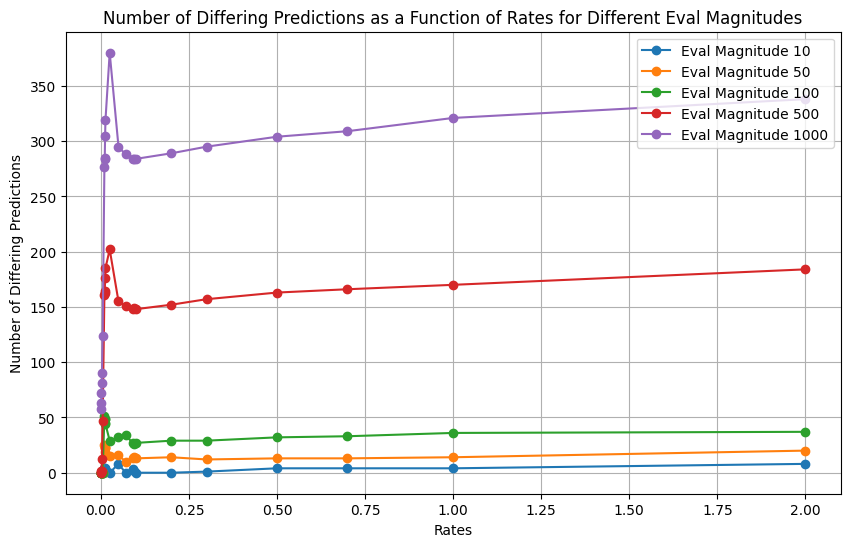

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Create one figure

for mag in eval_magnitude:
  different = differents[mag]
  diff_values = [row[1] for row in different]
  plt.plot(rates, diff_values, marker='o', label=f'Eval Magnitude {mag}')  # Add label for legend

plt.xlabel('Rates')
plt.ylabel('Number of Differing Predictions')
plt.title('Number of Differing Predictions as a Function of Rates for Different Eval Magnitudes')
plt.grid(True)
plt.legend()  # Add legend to the plot
plt.show()
